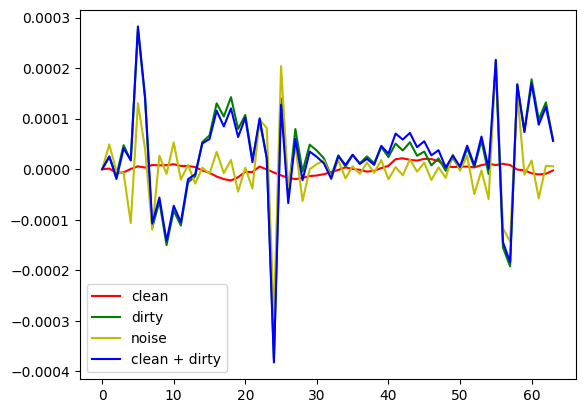

In [2]:
import numpy as np
import matplotlib.pyplot as plt

clean = np.load('data_segmented/16/clean.npy')
dirty = np.load('data_segmented/16/dirty.npy')
noise = np.load('data_segmented/16/noise.npy')

# Plotting both the curves simultaneously
plt.plot(clean[0,0,:], color='r', label='clean')
plt.plot(dirty[0,0,:], color='g', label='dirty')
plt.plot(noise[0,0,:], color = 'y', label='noise')
plt.plot(clean[0,0,:] + dirty[0,0,:], color='b', label='clean + dirty')

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [3]:
clean.shape

(5990, 26, 64)

Device used: cpu

Visualizing predictions from best model...


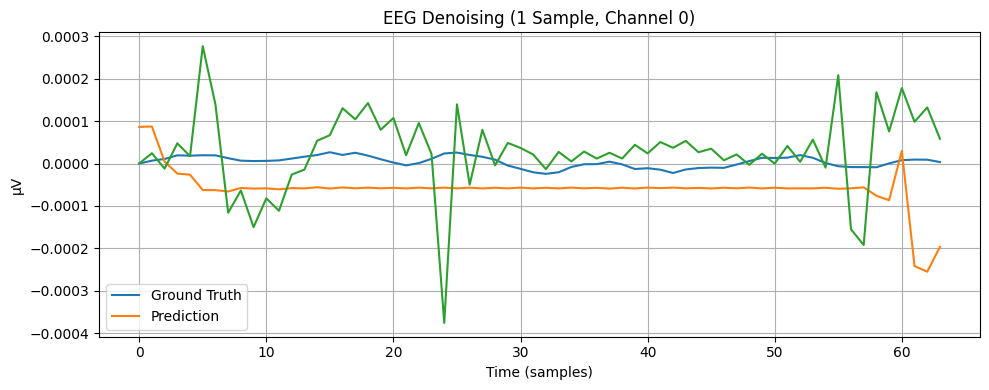

In [13]:
from resunet import DeepDSP_UNetRes
import torch

model_save_path = 'best_model.pt'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device used:", device)
print("\nVisualizing predictions from best model...")

model = DeepDSP_UNetRes().to(device)
model.load_state_dict(torch.load(model_save_path))
model.eval()

with torch.no_grad():
    ch = 0  # EEG channel index
    x = np.stack([dirty[1, ch], noise[1, ch]], axis=0).astype(np.float32)  # shape: [2, T]

    x_tensor = torch.from_numpy(x).unsqueeze(0).to(device)  # → shape: [1, 2, T]
    
    y = clean[1, ch][None, None, ...]  # → shape: [1, 1, T]

    y_hat = model(x_tensor)

    # Plot
    t = np.arange(y.shape[-1])
    plt.figure(figsize=(10, 4))
    plt.plot(t, y[0, 0], label="Ground Truth")
    plt.plot(t, y_hat[0, 0].cpu(), label="Prediction")
    plt.plot(t,dirty[0,0])
    plt.title("EEG Denoising (1 Sample, Channel 0)")
    plt.xlabel("Time (samples)")
    plt.ylabel("µV")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
